In [1]:
import numpy as np
import torch

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

In [2]:
from qiskit import Aer, QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.opflow import StateFn, PauliSumOp, AerPauliExpectation, ListOp, Gradient, OperatorStateFn
from qiskit.utils import QuantumInstance
import matplotlib.pyplot as plt

In [3]:
# Set a random seed
np.random.seed(42)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns', None)
card = pd.read_csv(r'creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from sklearn.preprocessing import StandardScaler

features = ['V'+str(i) for i in range(1,29)]# Separating out the features
print(features)
x = card.loc[:, features].values# Separating out the target
y = card.loc[:,['Class']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2'])
finalDf = pd.concat([principalDf, card[['Class']]], axis = 1)
print(finalDf)

            PC_1      PC_2  Class
0      -0.159489  0.437233      0
1       0.429272  0.292809      0
2      -0.185115  2.124219      0
3      -1.880863  1.746039      0
4       0.078020 -0.012290      0
...          ...       ...    ...
284802  3.010082 -2.320279      0
284803  0.850977  2.213870      0
284804 -0.387380 -0.031430      0
284805 -0.157637 -0.940931      0
284806  0.452724  0.157124      0

[284807 rows x 3 columns]


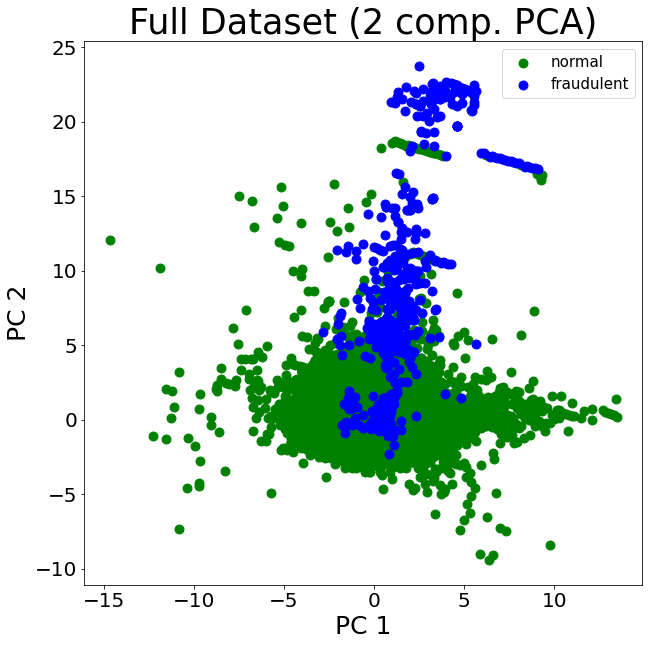

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))

plt.xlabel('PC 1', fontsize = 25)
plt.ylabel('PC 2', fontsize = 25)
plt.title('Full Dataset (2 comp. PCA)', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    filter1 = np.abs(finalDf['PC_1']) < 15
    filter2 = np.abs(finalDf['PC_2']) < 25
    final_indices = np.logical_and(filter1, indicesToKeep)
    final_indices = np.logical_and(filter2, final_indices)
    plt.scatter(finalDf.loc[final_indices, 'PC_1'],
               finalDf.loc[final_indices, 'PC_2'],
               c = color, s = 80)
plt.legend(["normal", "fraudulent"], prop={'size': 15})
# plt.grid()

In [9]:
good_idx = finalDf['Class'] == 0
bad_idx = finalDf['Class'] == 1

good_data = finalDf.loc[good_idx]
bad_data = finalDf.loc[bad_idx]
print(good_data.shape)
print(bad_data.shape)

good_sampling = np.random.randint(len(good_data), size=200)
final_good = good_data.loc[good_data.index.values[good_sampling]].reset_index(drop=True)

bad_sampling = np.random.randint(len(bad_data), size=200)
final_bad = bad_data.loc[bad_data.index.values[bad_sampling]].reset_index(drop=True)

final = pd.concat([final_good, final_bad], axis=0)

from sklearn.utils import shuffle
final = shuffle(final).reset_index(drop=True)
print(final)

(284315, 3)
(492, 3)
         PC_1       PC_2  Class
0    0.166049  -0.415800      0
1    0.959359   5.088638      1
2    2.228830  22.094746      1
3    0.004123   5.401093      1
4    0.403141   0.107433      0
..        ...        ...    ...
395 -0.127230  -0.209708      0
396 -0.211004   4.117775      1
397  0.092443  -0.260135      1
398  2.317528   0.230972      1
399 -1.792219   4.360807      1

[400 rows x 3 columns]


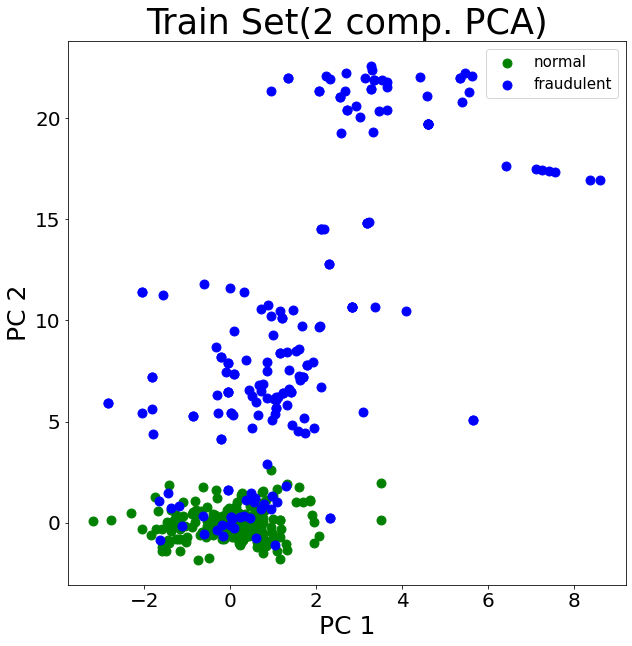

In [10]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# # ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# # ax.set_ylabel('Principal Component 3', fontsize = 15)
# ax.set_title('Train Set (2 comp. PCA)', fontsize = 20)
# targets = [0, 1]
# colors = ['g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = final['Class'] == target
#     ax.scatter(final.loc[indicesToKeep, 'PC_1']
#                , final.loc[indicesToKeep, 'PC_2']
# #              , finalDf.loc[indicesToKeep, 'PC_3']
#                , c = color
#                , s = 15)
# ax.legend(targets)
# ax.grid()


fig = plt.figure(figsize = (10,10))

plt.xlabel('PC 1', fontsize = 25)
plt.ylabel('PC 2', fontsize = 25)
plt.title('Train Set(2 comp. PCA)', fontsize =35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['Class'] == target
    filter1 = np.abs(final['PC_1']) < 15
    filter2 = np.abs(final['PC_2']) < 25
    
    final_indices = np.logical_and(filter1, indicesToKeep)
    final_indices = np.logical_and(filter2, final_indices)
    plt.scatter(final.loc[final_indices, 'PC_1'],
    final.loc[final_indices, 'PC_2'],
    c = color, s = 80)
plt.legend(['normal', 'fraudulent'], prop={'size': 15})
# plt.grid()

In [11]:
X_train = final.values
# X_train = np.hstack((X_train[:,:-1], np.zeros((X_train.shape[0], 1)))) # padding to reach 3 dimensions
X_train = X_train[:,:-1]
label_angles = np.asarray([y if y==1 else -1 for y in final.loc[:,'Class']]).reshape(-1,1)
# X_train = np.hstack((X_train, label_angles))
new_y_train = np.ones(((X_train.shape[0], 1)))
print(X_train)

y_train = final.loc[:,'Class']

train_features = np.array(X_train)
train_targets = np.array(y_train).reshape([-1,1])

[[ 1.66049130e-01 -4.15799716e-01]
 [ 9.59358579e-01  5.08863832e+00]
 [ 2.22882954e+00  2.20947461e+01]
 [ 4.12297278e-03  5.40109285e+00]
 [ 4.03140817e-01  1.07433249e-01]
 [ 2.35462625e-01  2.53800017e-01]
 [ 1.07153350e+00  6.04627627e+00]
 [-5.38156483e-01 -3.34635935e-01]
 [ 1.38381980e-01  7.90187681e-01]
 [-1.43878353e+00 -1.02226951e+00]
 [-6.57641304e-02  1.61751917e+00]
 [ 4.17647400e-01  1.81390361e-01]
 [ 7.11534105e+00  1.75022851e+01]
 [-1.17481065e+00  1.90799869e-01]
 [ 3.12681509e-01  1.14307698e+01]
 [ 4.24038895e-01 -5.46306575e-01]
 [ 1.13342012e-01  7.88854068e-01]
 [-1.65808144e+00  1.08050802e+00]
 [ 2.10240987e+00  6.70014974e+00]
 [ 2.06055720e-01 -7.89880092e-01]
 [ 1.92983459e-01  4.56471213e-01]
 [ 6.02169267e-01  4.27569604e-01]
 [ 3.27467572e-01 -6.38907028e-01]
 [ 1.72824570e+00  4.42221659e+00]
 [-2.09637139e-01  8.18960124e+00]
 [ 1.84984215e+00  1.07544752e+00]
 [ 4.59032080e+00  1.97392595e+01]
 [ 2.07573971e+00  9.74559298e+00]
 [ 7.61476411e-01 -7

In [12]:
import random
from sklearn.utils import shuffle

t_good_idx = finalDf['Class'] == 0
t_bad_idx = finalDf['Class'] == 1

new_good_data = finalDf.loc[t_good_idx]
new_bad_data = finalDf.loc[t_bad_idx]

new_good_sampling = random.sample([i for i in range(len(new_good_data)) if i not in good_sampling],330)
new_final_good = new_good_data.loc[new_good_data.index.values[new_good_sampling]].reset_index(drop=True)

new_bad_sampling = [i for i in range(len(new_bad_data)) if i not in bad_sampling]
new_final_bad = new_bad_data.loc[new_bad_data.index.values[new_bad_sampling]].reset_index(drop=True)

new_final = pd.concat([new_final_good, new_final_bad], axis=0)
new_final = shuffle(new_final).reset_index(drop=True)

val_features = np.array(new_final.values[:,:-1])
val_targets = np.array(new_final.values[:,-1].reshape([-1,1]))

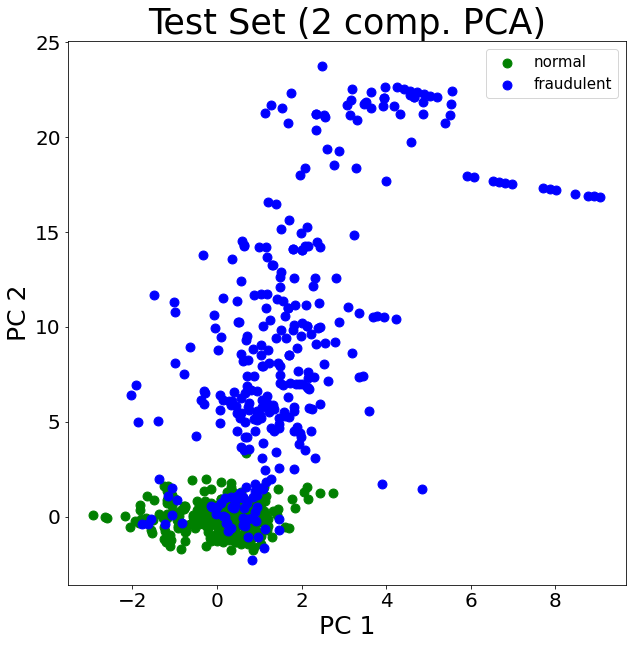

In [13]:
fig = plt.figure(figsize = (10,10))

plt.xlabel('PC 1', fontsize = 25)
plt.ylabel('PC 2', fontsize = 25)
plt.title('Test Set (2 comp. PCA)', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = new_final['Class'] == target
    filter1 = np.abs(new_final['PC_1']) < 15
    filter2 = np.abs(new_final['PC_2']) < 25
    
    final_indices = np.logical_and(filter1, indicesToKeep)
    final_indices = np.logical_and(filter2, final_indices)
    plt.scatter(new_final.loc[final_indices, 'PC_1'],
    new_final.loc[final_indices, 'PC_2'],
    c = color, s = 80)
plt.legend(['normal', 'fraudulent'], prop={'size': 15})
# plt.grid()

In [14]:
# Analyze class imbalance

print(train_targets.shape)
counts = np.bincount(train_targets[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

(400, 1)
Number of positive samples in training data: 200 (50.00% of total)


In [15]:
# Normalize data

mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

print(val_features.shape)

(660, 2)


In [16]:
# Build binary classif. model
# ! pip install tensorflow
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            5, activation="relu", input_shape=(train_features.shape[-1],)
        ),
#         keras.layers.Dense(256, activation="relu"),
#         keras.layers.Dropout(0.3),
#         keras.layers.Dense(256, activation="relu"),
#         keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train model with class_weight argument

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
    train_features,
    train_targets,
    batch_size=500,
    epochs=150,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

Epoch 1/150
1/1 - 2s - loss: 0.0028 - fn: 73.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 127.0000 - precision: 1.0000 - recall: 0.6350 - val_loss: 0.5607 - val_fn: 98.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 232.0000 - val_precision: 1.0000 - val_recall: 0.7030
Epoch 2/150
1/1 - 0s - loss: 0.0028 - fn: 60.0000 - fp: 2.0000 - tn: 198.0000 - tp: 140.0000 - precision: 0.9859 - recall: 0.7000 - val_loss: 0.5539 - val_fn: 97.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 233.0000 - val_precision: 1.0000 - val_recall: 0.7061
Epoch 3/150
1/1 - 0s - loss: 0.0028 - fn: 60.0000 - fp: 2.0000 - tn: 198.0000 - tp: 140.0000 - precision: 0.9859 - recall: 0.7000 - val_loss: 0.5471 - val_fn: 97.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 233.0000 - val_precision: 1.0000 - val_recall: 0.7061
Epoch 4/150
1/1 - 0s - loss: 0.0027 - fn: 60.0000 - fp: 2.0000 - tn: 198.0000 - tp: 140.0000 - precision: 0.9859 - recall: 0.7000 - val_loss: 0.5403 - val_fn: 97.0000 - val_fp: 0.0000

Epoch 32/150
1/1 - 0s - loss: 0.0020 - fn: 49.0000 - fp: 1.0000 - tn: 199.0000 - tp: 151.0000 - precision: 0.9934 - recall: 0.7550 - val_loss: 0.3933 - val_fn: 77.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 253.0000 - val_precision: 1.0000 - val_recall: 0.7667
Epoch 33/150
1/1 - 0s - loss: 0.0019 - fn: 47.0000 - fp: 1.0000 - tn: 199.0000 - tp: 153.0000 - precision: 0.9935 - recall: 0.7650 - val_loss: 0.3895 - val_fn: 77.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 253.0000 - val_precision: 1.0000 - val_recall: 0.7667
Epoch 34/150
1/1 - 0s - loss: 0.0019 - fn: 45.0000 - fp: 1.0000 - tn: 199.0000 - tp: 155.0000 - precision: 0.9936 - recall: 0.7750 - val_loss: 0.3858 - val_fn: 76.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 254.0000 - val_precision: 1.0000 - val_recall: 0.7697
Epoch 35/150
1/1 - 0s - loss: 0.0019 - fn: 45.0000 - fp: 1.0000 - tn: 199.0000 - tp: 155.0000 - precision: 0.9936 - recall: 0.7750 - val_loss: 0.3822 - val_fn: 76.0000 - val_fp: 0.0000

Epoch 62/150
1/1 - 0s - loss: 0.0015 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.3146 - val_fn: 65.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 265.0000 - val_precision: 1.0000 - val_recall: 0.8030
Epoch 63/150
1/1 - 0s - loss: 0.0015 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.3129 - val_fn: 65.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 265.0000 - val_precision: 1.0000 - val_recall: 0.8030
Epoch 64/150
1/1 - 0s - loss: 0.0015 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.3113 - val_fn: 65.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 265.0000 - val_precision: 1.0000 - val_recall: 0.8030
Epoch 65/150
1/1 - 0s - loss: 0.0015 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.3097 - val_fn: 65.0000 

Epoch 93/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 165.0000 - precision: 1.0000 - recall: 0.8250 - val_loss: 0.2815 - val_fn: 64.0000 - val_fp: 1.0000 - val_tn: 329.0000 - val_tp: 266.0000 - val_precision: 0.9963 - val_recall: 0.8061
Epoch 94/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 165.0000 - precision: 1.0000 - recall: 0.8250 - val_loss: 0.2809 - val_fn: 63.0000 - val_fp: 1.0000 - val_tn: 329.0000 - val_tp: 267.0000 - val_precision: 0.9963 - val_recall: 0.8091
Epoch 95/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 165.0000 - precision: 1.0000 - recall: 0.8250 - val_loss: 0.2803 - val_fn: 63.0000 - val_fp: 1.0000 - val_tn: 329.0000 - val_tp: 267.0000 - val_precision: 0.9963 - val_recall: 0.8091
Epoch 96/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 165.0000 - precision: 1.0000 - recall: 0.8250 - val_loss: 0.2796 - val_fn: 62.0000 - val_fp: 1.

Epoch 124/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2667 - val_fn: 61.0000 - val_fp: 1.0000 - val_tn: 329.0000 - val_tp: 269.0000 - val_precision: 0.9963 - val_recall: 0.8152
Epoch 125/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2664 - val_fn: 61.0000 - val_fp: 1.0000 - val_tn: 329.0000 - val_tp: 269.0000 - val_precision: 0.9963 - val_recall: 0.8152
Epoch 126/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2661 - val_fn: 61.0000 - val_fp: 1.0000 - val_tn: 329.0000 - val_tp: 269.0000 - val_precision: 0.9963 - val_recall: 0.8152
Epoch 127/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2659 - val_fn: 61.0000 - val_fp: 1.0000 - val_t

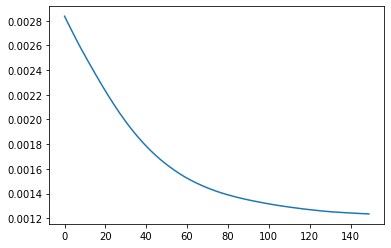

In [18]:
plt.plot(history.history['loss'])

In [19]:
predictions = model.predict(train_features)

thres_pred = []
threshold = 0.7
counts = 0 
tp=0
fn = 0
fp = 0
for (i,p) in enumerate(predictions):
    label = 0
    if p > threshold:
        label = 1
    else: 
        label = 0
    if label == train_targets[i]:
        counts +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    thres_pred.append(label)
print(counts/len(predictions))
print("tp: ", tp, "tn: ", counts-tp," fp: ", fp, " fn: ", fn)

0.91
tp:  164 tn:  200  fp:  36  fn:  0


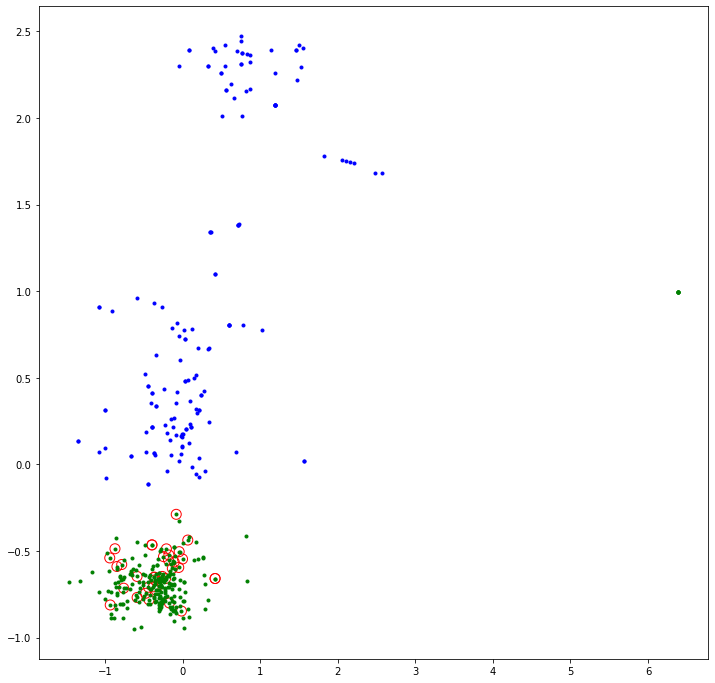

In [20]:
fig = plt.figure(figsize=(12,12))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for x, y_target, y_ in zip(train_features, train_targets, thres_pred):
    if y_ == 1 and x[0] < 5:
        plt.plot(x[0], x[1], 'bo', markersize=3)
    else:
        plt.plot(x[0], x[1], 'go', markersize=3)
    if y_target != y_:
        plt.scatter(x[0], x[1], s=100, facecolors='none', edgecolors='r', linewidths=1)
plt.show()

In [21]:
predictions = model.predict(val_features)

thres_pred = []
threshold = 0.7
counts = 0 
tp=0
fn = 0
fp = 0
for (i,p) in enumerate(predictions):
    label = 0
    if p > threshold:
        label = 1
    else: 
        label = 0
    if label == val_targets[i]:
        counts +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    thres_pred.append(label)
print(counts/len(predictions))
print("tp: ", tp, "tn: ", counts-tp," fp: ", fp, " fn: ", fn)

0.9015151515151515
tp:  266 tn:  329  fp:  64  fn:  1


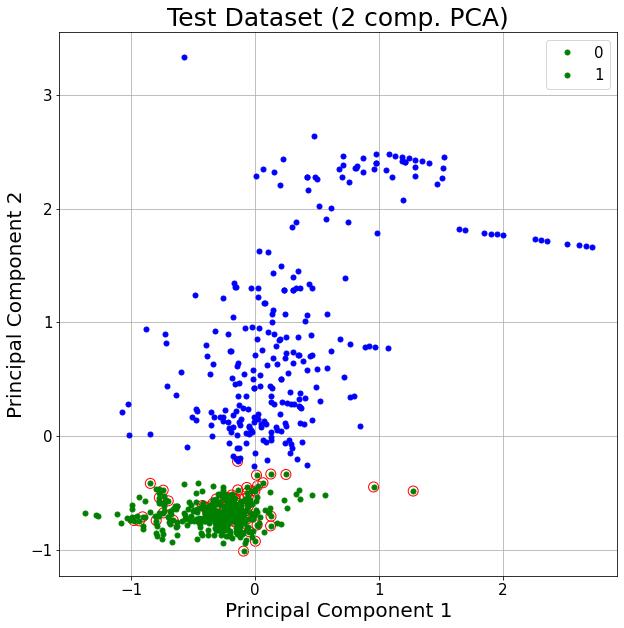

In [23]:
fig = plt.figure(figsize=(10,10))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.xlabel('Principal Component 1', fontsize = 20)
plt.ylabel('Principal Component 2', fontsize = 20)
plt.title('Test Dataset (2 comp. PCA)', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# print(thres_pred)
for x, y_target, y_ in zip(val_features, val_targets, thres_pred):
    if y_ == 1 and np.abs(x[0])<5:
        plt.plot(x[0], x[1], 'bo', markersize=5)
    elif y_== 0 and np.abs(x[0])<5:
        plt.plot(x[0], x[1], 'go', markersize=5)
    if y_target != y_ and abs(x[0])<5:
        plt.scatter(x[0], x[1], s=100, facecolors='none', edgecolors='r', linewidths=1)
# plt.show()

plt.legend(targets, prop={'size': 15})
plt.grid()